In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)

X.shape

(100, 2)

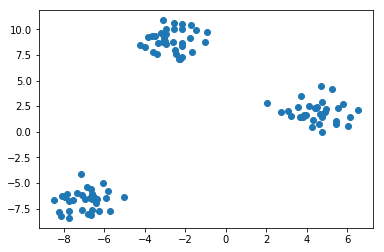

In [4]:
plt.scatter(X[:,0],X[:,1])  #visualise data

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [25]:
labels = kmeans.fit_predict(X)

In [7]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [8]:
np.all(y==labels)  # because the clustering number is random and which may not matches with the labels insteed 

False

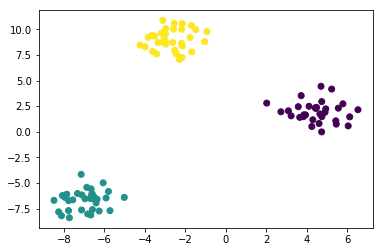

In [9]:
plt.scatter(X[:,0], X[:,1], c=labels)

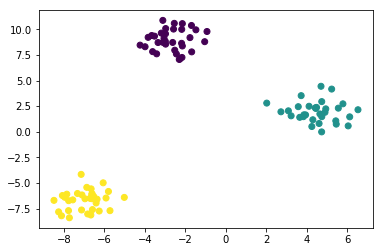

In [10]:
plt.scatter(X[:,0], X[:,1], c=y)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("accuracy score : ",accuracy_score(y,labels))
print(confusion_matrix(y,labels))

accuracy score :  0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [16]:
np.mean(y==labels)  #arbitrary numbering of cluster is not equal to the labels

0.0

In [18]:
# that's why we predict accuracy scaore using adjusted_rand_score matrix

from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y,labels)

1.0

In [26]:
kmeans.cluster_centers_

array([[ 4.49951001,  1.93892013],
       [-6.95170962, -6.67621669],
       [-2.66780392,  8.93576069]])

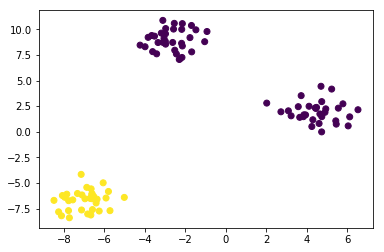

In [27]:
# defining wrong number of clusters 

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)

In [28]:
print(kmeans.cluster_centers_)

[[ 0.86236563  5.48955564]
 [-6.95170962 -6.67621669]]


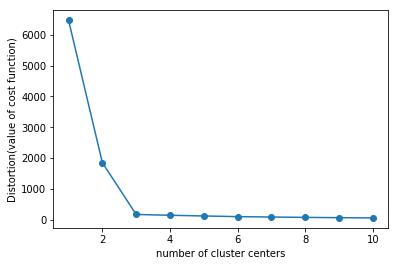

In [30]:
# choosing the correct number of clusters using elbow method

distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('number of cluster centers')
plt.ylabel('Distortion(value of cost function)')
plt.show()